In [ ]:
!pip install numpy==1.24.4 --force-reinstall --no-cache-dir


In [ ]:
!pip install roboflow pillow_heif

In [13]:
from roboflow import Roboflow

# Replace with your actual API key
rf = Roboflow(api_key="ICJ4mq2kjOsWDObZEzfY")

# Replace with your workspace name and project name
project = rf.workspace().project("pizzastore-qftv2")

# Replace with the version number you want (e.g., version 2)
dataset = project.version(5).download("yolov5")  # yolov5 format works for YOLOv12 too


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PizzaStore-5 in yolov5pytorch:: 100%|██████████| 2230/2230 [00:01<00:00, 2099.67it/s]


In [ ]:
!git clone https://github.com/sunsmarterjie/yolov12.git
%cd yolov12
!pip install -e .



In [14]:
%cd /kaggle/working/

/kaggle/working


In [26]:
%cd yolov12

/kaggle/working/yolov12


In [6]:
import gc
gc.collect()
import torch
torch.cuda.empty_cache()

In [ ]:
!pip install roboflow


In [ ]:
mv /kaggle/working/yolov12/PizzaStore-5 /kaggle/working/


In [11]:
rm  -rf /kaggle/working/PizzaStore-5

In [22]:
from ultralytics import YOLO

model = YOLO("yolov12l.yaml")  # now it is registered internally
model.train(data="/kaggle/working/PizzaStore-5/data.yaml",
    epochs=200,
    batch=8,
    # imgsz=640,
    cos_lr=True,
    pretrained=True,
    augment=True)


New https://pypi.org/project/ultralytics/8.3.156 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov12l.yaml, data=/kaggle/working/PizzaStore-5/data.yaml, epochs=200, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]
E0000 00:00:1750205043.937453     161 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750205044.002000     161 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2, 1, 2]         
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    147968  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2, 1, 4]        
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  4   4540416  ultralytics.nn.modules.block.A2C2f           [512, 512, 4, True, 4, True, 1.5]
  7                  -1  1   2360320  ultralyt

100%|██████████| 5.26M/5.26M [00:00<00:00, 73.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/PizzaStore-5/train/labels... 1029 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1029/1029 [00:00<00:00, 1457.68it/s]


train: WARNING ⚠️ /kaggle/working/PizzaStore-5/train/images/5_frame_000090_jpg.rf.179013e31b3ffdeb4f0b8921d18a6c29.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/PizzaStore-5/train/images/5_frame_000090_jpg.rf.2fb3bf315b3501374cfc03fc064b7dfb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/PizzaStore-5/train/images/5_frame_000090_jpg.rf.567090ea857aa0933f153cdfe19772e6.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/PizzaStore-5/train/images/5_frame_000210_jpg.rf.413cca3060ed52bf35f6e0aea3d9b271.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/PizzaStore-5/train/images/5_frame_000210_jpg.rf.70b64602e85f2b315e47792e42358eab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/PizzaStore-5/train/images/5_frame_000210_jpg.rf.d7062cf52ca05f561a4b4e9756b17051.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/PizzaStore-5/train/images/5_frame_000270_jpg.rf.1b897b7418a9740e48bb704f13a9a273.jpg

A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /kaggle/working/PizzaStore-5/valid/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 1065.02it/s]

val: WARNING ⚠️ /kaggle/working/PizzaStore-5/valid/images/5_frame_000045_jpg.rf.33229d0d1277ba9526644aae5dbd82eb.jpg: 1 duplicate labels removed
val: New cache created: /kaggle/working/PizzaStore-5/valid/labels.cache


Plotting labels to /kaggle/working/yolov12/runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 221 weight(decay=0.0), 230 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/yolov12/runs/detect/train7
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      9.92G      3.633       3.58      3.676        107        640: 100%|██████████| 129/129 [01:58<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         40        457    0.00643       0.24      0.173     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      10.1G      2.745       2.05      2.553         97        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.784      0.296      0.302      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200        10G       2.52       1.63      2.153         97        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         40        457      0.365      0.452      0.402      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      10.1G        2.3      1.398      1.867         47        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.482      0.566      0.566       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      9.98G      2.075      1.233      1.693        134        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.656      0.589      0.577      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      10.1G      1.902      1.093      1.547        106        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.698        0.6      0.616       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      10.1G      1.787      0.998      1.461        112        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.677      0.649      0.662      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      10.1G      1.712     0.9509      1.394         74        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.693      0.702      0.683       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      10.1G      1.634     0.8997      1.347        107        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.702      0.723      0.719      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      10.1G      1.576     0.8591      1.311        122        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.782      0.682      0.731      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      10.1G      1.542     0.8379      1.289         76        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         40        457      0.755      0.719       0.73      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      10.1G      1.537     0.8229       1.29        110        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.784      0.726      0.773      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      9.98G      1.498     0.8017      1.249         51        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.755      0.717      0.731      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      10.1G      1.446     0.7647      1.225         80        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457       0.76      0.739      0.766      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      10.1G      1.422     0.7423      1.211         99        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.811      0.795      0.812      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      10.1G      1.428     0.7515      1.217        121        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.814      0.732      0.778      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      10.1G      1.426     0.7381      1.212         89        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.808      0.741      0.793      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      10.1G      1.373     0.7135      1.182        131        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.824      0.776      0.796      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      10.1G      1.357     0.6997      1.174        125        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         40        457      0.851      0.784      0.828       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      10.1G      1.338     0.6896      1.164        110        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.755      0.799      0.809      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      9.97G       1.32     0.6843      1.161        108        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.843      0.716      0.752       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      10.1G      1.304     0.6675      1.149        101        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         40        457      0.786      0.766      0.785      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      10.1G      1.289     0.6629      1.139         94        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         40        457      0.828       0.76      0.811      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      10.1G      1.276     0.6559      1.127         84        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.865      0.805      0.823      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      10.1G      1.296     0.6646      1.141        101        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.848      0.803      0.844      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      10.1G      1.253     0.6426      1.118        118        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         40        457      0.846      0.753       0.81      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      10.1G      1.244     0.6389      1.122         76        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.888       0.81      0.852      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      10.1G       1.24     0.6354      1.118         73        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.848      0.828      0.857      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      9.97G      1.224     0.6286      1.113        125        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         40        457       0.88      0.828      0.858      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      10.1G      1.213     0.6172      1.099        108        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457       0.93      0.789      0.859      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      10.1G      1.214     0.6103        1.1        109        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.868      0.854      0.881       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      10.1G      1.209     0.6142      1.098        102        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.865      0.823      0.856      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      10.1G      1.185     0.6037      1.091        109        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.859      0.836      0.856      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      10.1G      1.179     0.5978      1.084        142        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.921      0.812       0.88      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      10.1G      1.182     0.5982      1.085        126        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.913      0.806      0.869      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      10.1G      1.159     0.5914      1.082        109        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         40        457      0.879       0.83      0.883      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      9.96G      1.202     0.6017      1.093         87        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.893      0.849      0.881      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      10.1G      1.169     0.5907      1.079         64        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.913      0.832       0.89      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      10.1G      1.145     0.5803      1.068         89        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         40        457      0.904      0.827      0.882      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      10.1G      1.145     0.5837      1.073         96        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.907      0.852      0.897      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      10.1G       1.14     0.5811       1.07         89        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.926      0.846      0.884      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      10.1G      1.117     0.5672      1.056        109        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         40        457      0.923      0.806      0.881      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      10.1G      1.124     0.5735       1.06         54        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         40        457      0.844      0.847      0.877      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      10.1G       1.13     0.5712      1.059        136        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.839      0.872      0.875      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      9.97G       1.11     0.5652      1.059        123        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.926      0.836      0.903      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      10.1G      1.111     0.5628      1.056         60        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457       0.87      0.858      0.879      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      10.1G      1.098     0.5551      1.053        128        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.871      0.836      0.872      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      10.1G      1.095     0.5524       1.05        136        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.869      0.858      0.892      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      10.1G      1.083     0.5472      1.043        104        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457       0.93      0.835      0.896      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      10.1G       1.09     0.5497      1.044         67        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.881      0.809      0.877      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      10.1G      1.081     0.5452      1.032        125        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.851      0.879      0.898      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      10.1G      1.074     0.5386      1.038        117        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.906       0.86      0.895      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      9.97G      1.089     0.5468      1.044        122        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457       0.89      0.857      0.897      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      10.1G      1.079     0.5451      1.037        104        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.884       0.85      0.887      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      10.1G       1.06     0.5333      1.029         75        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.894       0.86       0.89      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      10.1G      1.045     0.5251      1.023         77        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.908      0.864      0.896      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      10.1G      1.051     0.5308      1.027         77        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.949      0.836      0.902      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      10.1G       1.05     0.5286      1.026         81        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.906      0.871      0.905      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      10.1G      1.039     0.5228      1.022        156        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.876      0.874      0.902      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      10.1G      1.049     0.5265      1.023         82        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.892      0.878       0.91       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200        10G      1.024     0.5132      1.015         63        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.913      0.858      0.898       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      10.1G      1.034     0.5197      1.018        105        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         40        457      0.935      0.857      0.905      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      10.1G      1.018     0.5182      1.014         32        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         40        457      0.934      0.863      0.908      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      10.1G      1.022      0.516      1.016        111        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.897      0.867      0.904      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      10.1G      1.025     0.5155      1.014         75        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.907      0.867      0.907      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      10.1G      1.033     0.5186      1.021         49        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.897      0.849       0.89      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      10.1G      1.023     0.5152      1.014        131        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         40        457      0.893      0.843      0.894       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      10.1G      1.013     0.5105      1.006         70        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.908      0.864      0.907      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200        10G      1.028     0.5207      1.017        137        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.908      0.869      0.902      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      10.1G     0.9954     0.5042      1.006        121        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457        0.9      0.859      0.897      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      10.1G       1.01     0.5102      1.012        117        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457       0.94      0.813      0.878      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      10.1G     0.9903     0.4975      1.002         79        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.879      0.873      0.899       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      10.1G     0.9913     0.5001     0.9983        136        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.893      0.875      0.912      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      10.1G     0.9985     0.5019      1.013        102        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         40        457      0.917       0.87      0.914       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      10.1G     0.9967     0.5037      1.004        118        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.875      0.887      0.913      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      10.1G       0.99     0.4938          1        108        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.941      0.843      0.905      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      9.95G     0.9817     0.4957     0.9992         88        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.939      0.872      0.916      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      10.1G      0.972     0.4931     0.9954         85        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.909      0.856      0.901      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      10.1G      0.981     0.4918      1.001        128        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457       0.91      0.875      0.907      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      10.1G     0.9669     0.4864     0.9919         79        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.901      0.889      0.909      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      10.1G     0.9649     0.4863     0.9854         93        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.933      0.865      0.912      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      10.1G     0.9727     0.4895     0.9891        120        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         40        457        0.9      0.892      0.913      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      10.1G     0.9528     0.4797     0.9835        100        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.917      0.852       0.91      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      10.1G     0.9424     0.4755     0.9802        123        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.888      0.868      0.907      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      9.97G      0.957     0.4803     0.9844        148        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.914      0.887      0.917      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      10.1G     0.9623     0.4822     0.9836         97        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.873      0.908      0.915      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      10.1G     0.9509     0.4782     0.9826        114        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.902      0.891      0.919      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      10.1G     0.9346     0.4752      0.976         83        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.914      0.873       0.91      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      10.1G     0.9497     0.4773     0.9786         98        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.904      0.889      0.912      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      10.1G     0.9324     0.4692     0.9748         86        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.913      0.885      0.918      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      10.1G     0.9284     0.4685     0.9752         86        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.894      0.881      0.918      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      10.1G     0.9314     0.4721     0.9779         70        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.938      0.853      0.905      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      9.98G     0.9231     0.4649     0.9738        135        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.903      0.857      0.907      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      10.1G     0.9193     0.4647      0.969         90        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.929      0.889       0.92      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      10.1G     0.9169     0.4655     0.9701         71        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457       0.95      0.867      0.915      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      10.1G     0.9312     0.4696     0.9715        103        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.898      0.886      0.919      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      10.1G     0.9067     0.4574      0.963         78        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.928      0.892      0.924      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      10.1G     0.9165     0.4647      0.972         71        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.944      0.881      0.926      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      10.1G     0.9141     0.4621     0.9707        105        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.916      0.891       0.92      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      10.1G     0.9069       0.46     0.9645        105        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457       0.92      0.882       0.91      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      9.98G      0.893       0.45     0.9577         95        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.911       0.88       0.92      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      10.1G     0.8885     0.4543      0.959         93        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.942      0.883      0.928      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      10.1G     0.9096     0.4596     0.9681         87        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.887      0.887      0.908      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      10.1G     0.8971     0.4535     0.9614         92        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457        0.9      0.882      0.923      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      10.1G     0.8793     0.4435     0.9577         86        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.919      0.883      0.921      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      10.1G     0.8948     0.4488     0.9625         57        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.925      0.878      0.919      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      10.1G     0.8824     0.4452     0.9592        146        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.902      0.911      0.926      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      10.1G     0.8789     0.4423     0.9551         91        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         40        457       0.94      0.886      0.931       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      9.96G      0.882     0.4441      0.954         76        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         40        457        0.9      0.898      0.922      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      10.1G     0.8765     0.4421     0.9559         99        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.938      0.874      0.924      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      10.1G     0.8664     0.4426      0.953        109        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.921      0.882      0.927      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      10.1G     0.8565      0.439     0.9491        105        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.906      0.887      0.915      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      10.1G     0.8728     0.4435     0.9556        133        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         40        457      0.941      0.881      0.924      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      10.1G     0.8616     0.4357      0.946         95        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         40        457      0.928      0.898      0.928      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      10.1G     0.8705     0.4357     0.9512         82        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.938      0.878      0.925      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      10.1G     0.8423     0.4309     0.9411         96        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.918      0.893      0.925      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      9.96G     0.8413     0.4279     0.9443         87        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.931      0.884      0.924      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      10.1G     0.8541      0.432     0.9471        128        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.938      0.889      0.924      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      10.1G      0.854      0.435      0.952         91        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         40        457      0.907      0.878      0.919      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      10.1G     0.8449     0.4318     0.9445         68        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.929      0.886      0.921      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      10.1G     0.8336     0.4222     0.9405        110        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.926       0.89      0.922      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      10.1G     0.8459     0.4293     0.9415        108        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.937      0.886      0.923      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      10.1G     0.8471     0.4304     0.9449        103        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457       0.92      0.862      0.909      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      10.1G     0.8372     0.4256     0.9412         90        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         40        457      0.928      0.873      0.913      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      9.96G     0.8367     0.4259     0.9429        140        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.918      0.888      0.921      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      10.1G     0.8238     0.4203     0.9392         81        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.891      0.898      0.921      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      10.1G     0.8269     0.4204     0.9379         66        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.911      0.884      0.914      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      10.1G     0.8247     0.4196     0.9351         99        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.942       0.87      0.923      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      10.1G     0.8236     0.4202     0.9329        150        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.951      0.874      0.926      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      10.1G     0.8328     0.4215     0.9375         57        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         40        457      0.926      0.886      0.925      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      10.1G     0.8308      0.423     0.9388         70        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         40        457      0.942      0.882      0.926      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      10.1G     0.8278     0.4202     0.9373         59        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.937      0.901      0.927      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200        10G     0.8228     0.4207     0.9366        103        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.939      0.882      0.922      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      10.1G     0.8124     0.4155     0.9302        120        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.909      0.902      0.926      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      10.1G     0.8119      0.411     0.9341        103        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.907      0.896      0.924      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      10.1G     0.8052      0.412     0.9302         99        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         40        457      0.889        0.9      0.921      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      10.1G     0.7976     0.4069     0.9243         96        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.926      0.891       0.93      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      10.1G     0.7962     0.4084     0.9231        112        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.933      0.905      0.931      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      10.1G      0.807     0.4116     0.9324        118        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.924      0.886      0.924      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      10.1G     0.7939      0.409     0.9229        102        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457       0.93      0.884      0.925      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      9.99G     0.8038     0.4076     0.9285        102        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.932      0.887      0.929      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      10.1G     0.7964     0.4076     0.9251        104        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.903      0.903       0.92      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      10.1G     0.7839     0.3995     0.9193         75        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.906      0.909       0.93      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      10.1G     0.7966     0.4077     0.9225        120        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.909      0.905      0.929      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      10.1G     0.7811     0.4028     0.9185        139        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.921      0.899       0.92      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      10.1G     0.7915     0.4077     0.9297         95        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.915      0.904      0.925      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      10.1G      0.783     0.4027     0.9214        102        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.907      0.886      0.927       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      10.1G     0.7802        0.4     0.9212         66        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.904      0.916      0.929      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      9.97G     0.7887     0.4039     0.9258        124        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.903       0.92      0.931      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      10.1G     0.7854     0.4023     0.9239        134        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.928      0.907      0.933      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      10.1G     0.7815     0.3986     0.9219         98        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.916       0.89      0.921      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      10.1G     0.7776     0.4034     0.9219        115        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         40        457      0.903      0.911      0.929      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      10.1G     0.7617      0.394     0.9119         97        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         40        457      0.922      0.909      0.927      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      10.1G     0.7731     0.3979     0.9234        140        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.908      0.903       0.92      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      10.1G     0.7611     0.3933     0.9138        111        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.902       0.89      0.925      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      10.1G     0.7647     0.3928     0.9155        169        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.911      0.899      0.924      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      9.95G     0.7668     0.3971     0.9146         83        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.937      0.895      0.927      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      10.1G     0.7652     0.3943     0.9186        142        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.908      0.913      0.934      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200        10G     0.7681     0.3961     0.9169        105        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.919      0.905       0.93       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      10.1G     0.7546     0.3905     0.9109        130        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457       0.91      0.899      0.931      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      10.1G     0.7596     0.3895     0.9142        120        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.912      0.896      0.933      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      10.1G     0.7458     0.3884     0.9126         63        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         40        457      0.908      0.901      0.927      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      10.1G     0.7538     0.3896     0.9119         61        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.894      0.906      0.924      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      10.1G     0.7474     0.3871     0.9125         94        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.903        0.9      0.926       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      9.98G     0.7485     0.3875      0.912        103        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.898      0.922      0.933      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      10.1G     0.7427     0.3842      0.911         83        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.916        0.9      0.925      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      10.1G     0.7494     0.3866     0.9126        114        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.921      0.911      0.932      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      10.1G     0.7481     0.3851     0.9063        121        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.898      0.901      0.926      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      10.1G     0.7415     0.3867     0.9079         73        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.905      0.911      0.928      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      10.1G     0.7388     0.3849     0.9093        101        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.917      0.896      0.927      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      10.1G     0.7332     0.3805     0.9112         42        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.918      0.896      0.928      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      10.1G     0.7311     0.3824     0.9017         86        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457       0.91      0.906      0.928      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      9.96G     0.7427     0.3855     0.9085         73        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.914      0.908      0.929       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      10.1G     0.7416     0.3856     0.9075        154        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         40        457      0.916       0.91       0.93       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      10.1G     0.7346     0.3825     0.9051         93        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.921      0.909      0.933      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      10.1G     0.7203      0.374     0.8994         68        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.913      0.912      0.933      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      10.1G     0.7263     0.3798     0.9024         87        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.927      0.916      0.932       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      10.1G     0.7297     0.3796     0.9058         94        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.922      0.907      0.929      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      10.1G     0.7263     0.3789     0.9014         82        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.906       0.91      0.928      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      10.1G     0.7144     0.3717     0.9014         61        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         40        457      0.908       0.91       0.93      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200        10G     0.7267     0.3773     0.9093        121        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         40        457      0.925      0.898      0.928       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      10.1G     0.7177     0.3774     0.9002        141        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.931      0.898      0.932      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      10.1G     0.7332     0.3809     0.9033        171        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.927      0.899       0.93      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      10.1G     0.7236     0.3764      0.904        102        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.927      0.893      0.928      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      10.1G     0.7222     0.3778     0.9015        124        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         40        457       0.91       0.91       0.93      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      10.1G     0.7303     0.3805     0.9049         47        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         40        457      0.922      0.909      0.931      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      10.1G     0.7141      0.375     0.9044         74        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         40        457      0.919      0.909      0.932      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      10.1G     0.7227      0.375     0.9066        150        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.929      0.901      0.933      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      9.97G     0.7225     0.3764     0.9066         62        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         40        457      0.928      0.903       0.93      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      10.1G     0.7237     0.3782     0.9047         86        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.921      0.908      0.931      0.634


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      10.1G     0.7396     0.3806     0.8828         58        640: 100%|██████████| 129/129 [01:55<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457       0.91      0.906      0.924      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      10.1G     0.7236     0.3744     0.8777         51        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.917      0.901      0.923      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      10.1G     0.7186     0.3734     0.8773         55        640: 100%|██████████| 129/129 [01:54<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         40        457      0.927      0.894      0.923      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      10.1G     0.6987     0.3662     0.8695         54        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         40        457      0.913        0.9      0.922      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      10.1G     0.7114     0.3693     0.8758         63        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         40        457      0.909      0.906      0.926      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      10.1G     0.7017     0.3646     0.8731         56        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         40        457      0.904      0.905      0.926      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      9.95G     0.7032     0.3655     0.8712         57        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         40        457      0.922      0.895      0.925      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      10.1G     0.7018     0.3641     0.8756         53        640: 100%|██████████| 129/129 [01:54<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         40        457      0.921      0.902      0.925      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      10.1G      0.705     0.3669     0.8781         57        640: 100%|██████████| 129/129 [01:54<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         40        457       0.91      0.903      0.925      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      10.1G     0.6994     0.3637     0.8709         55        640: 100%|██████████| 129/129 [01:54<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         40        457      0.913      0.903      0.924      0.622



200 epochs completed in 6.530 hours.
Optimizer stripped from /kaggle/working/yolov12/runs/detect/train7/weights/last.pt, 53.7MB
Optimizer stripped from /kaggle/working/yolov12/runs/detect/train7/weights/best.pt, 53.7MB

Validating /kaggle/working/yolov12/runs/detect/train7/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12l summary (fused): 674 layers, 26,396,636 parameters, 0 gradients, 82.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all         40        457      0.936      0.876      0.927      0.621
                  hand         40         99      0.878      0.808      0.889      0.458
                person         40         60      0.956      0.983      0.991      0.736
                 pizza         38         94      0.981      0.968      0.979      0.862
               scooper         40        204      0.927      0.745      0.848      0.428
Speed: 0.1ms preprocess, 54.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/yolov12/runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa06c483950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [24]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/kaggle/working/yolov12/runs/detect/train7/weights/best.pt")

# Evaluate on test set
metrics = model.val(data="/kaggle/working/PizzaStore-5/data.yaml", split="test", save_json=True)


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12l summary (fused): 674 layers, 26,396,636 parameters, 0 gradients, 82.1 GFLOPs


val: Scanning /kaggle/working/PizzaStore-5/test/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 387.41it/s]

val: New cache created: /kaggle/working/PizzaStore-5/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


                   all         40        459      0.871      0.907      0.914      0.615
                  hand         40         98      0.775      0.857      0.877      0.428
                person         40         64      0.896      0.984      0.962       0.75
                 pizza         39         93      0.944      0.978      0.979       0.86
               scooper         40        204      0.867      0.809      0.837      0.422
Speed: 0.1ms preprocess, 18.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Saving /kaggle/working/yolov12/runs/detect/val/predictions.json...
Results saved to /kaggle/working/yolov12/runs/detect/val


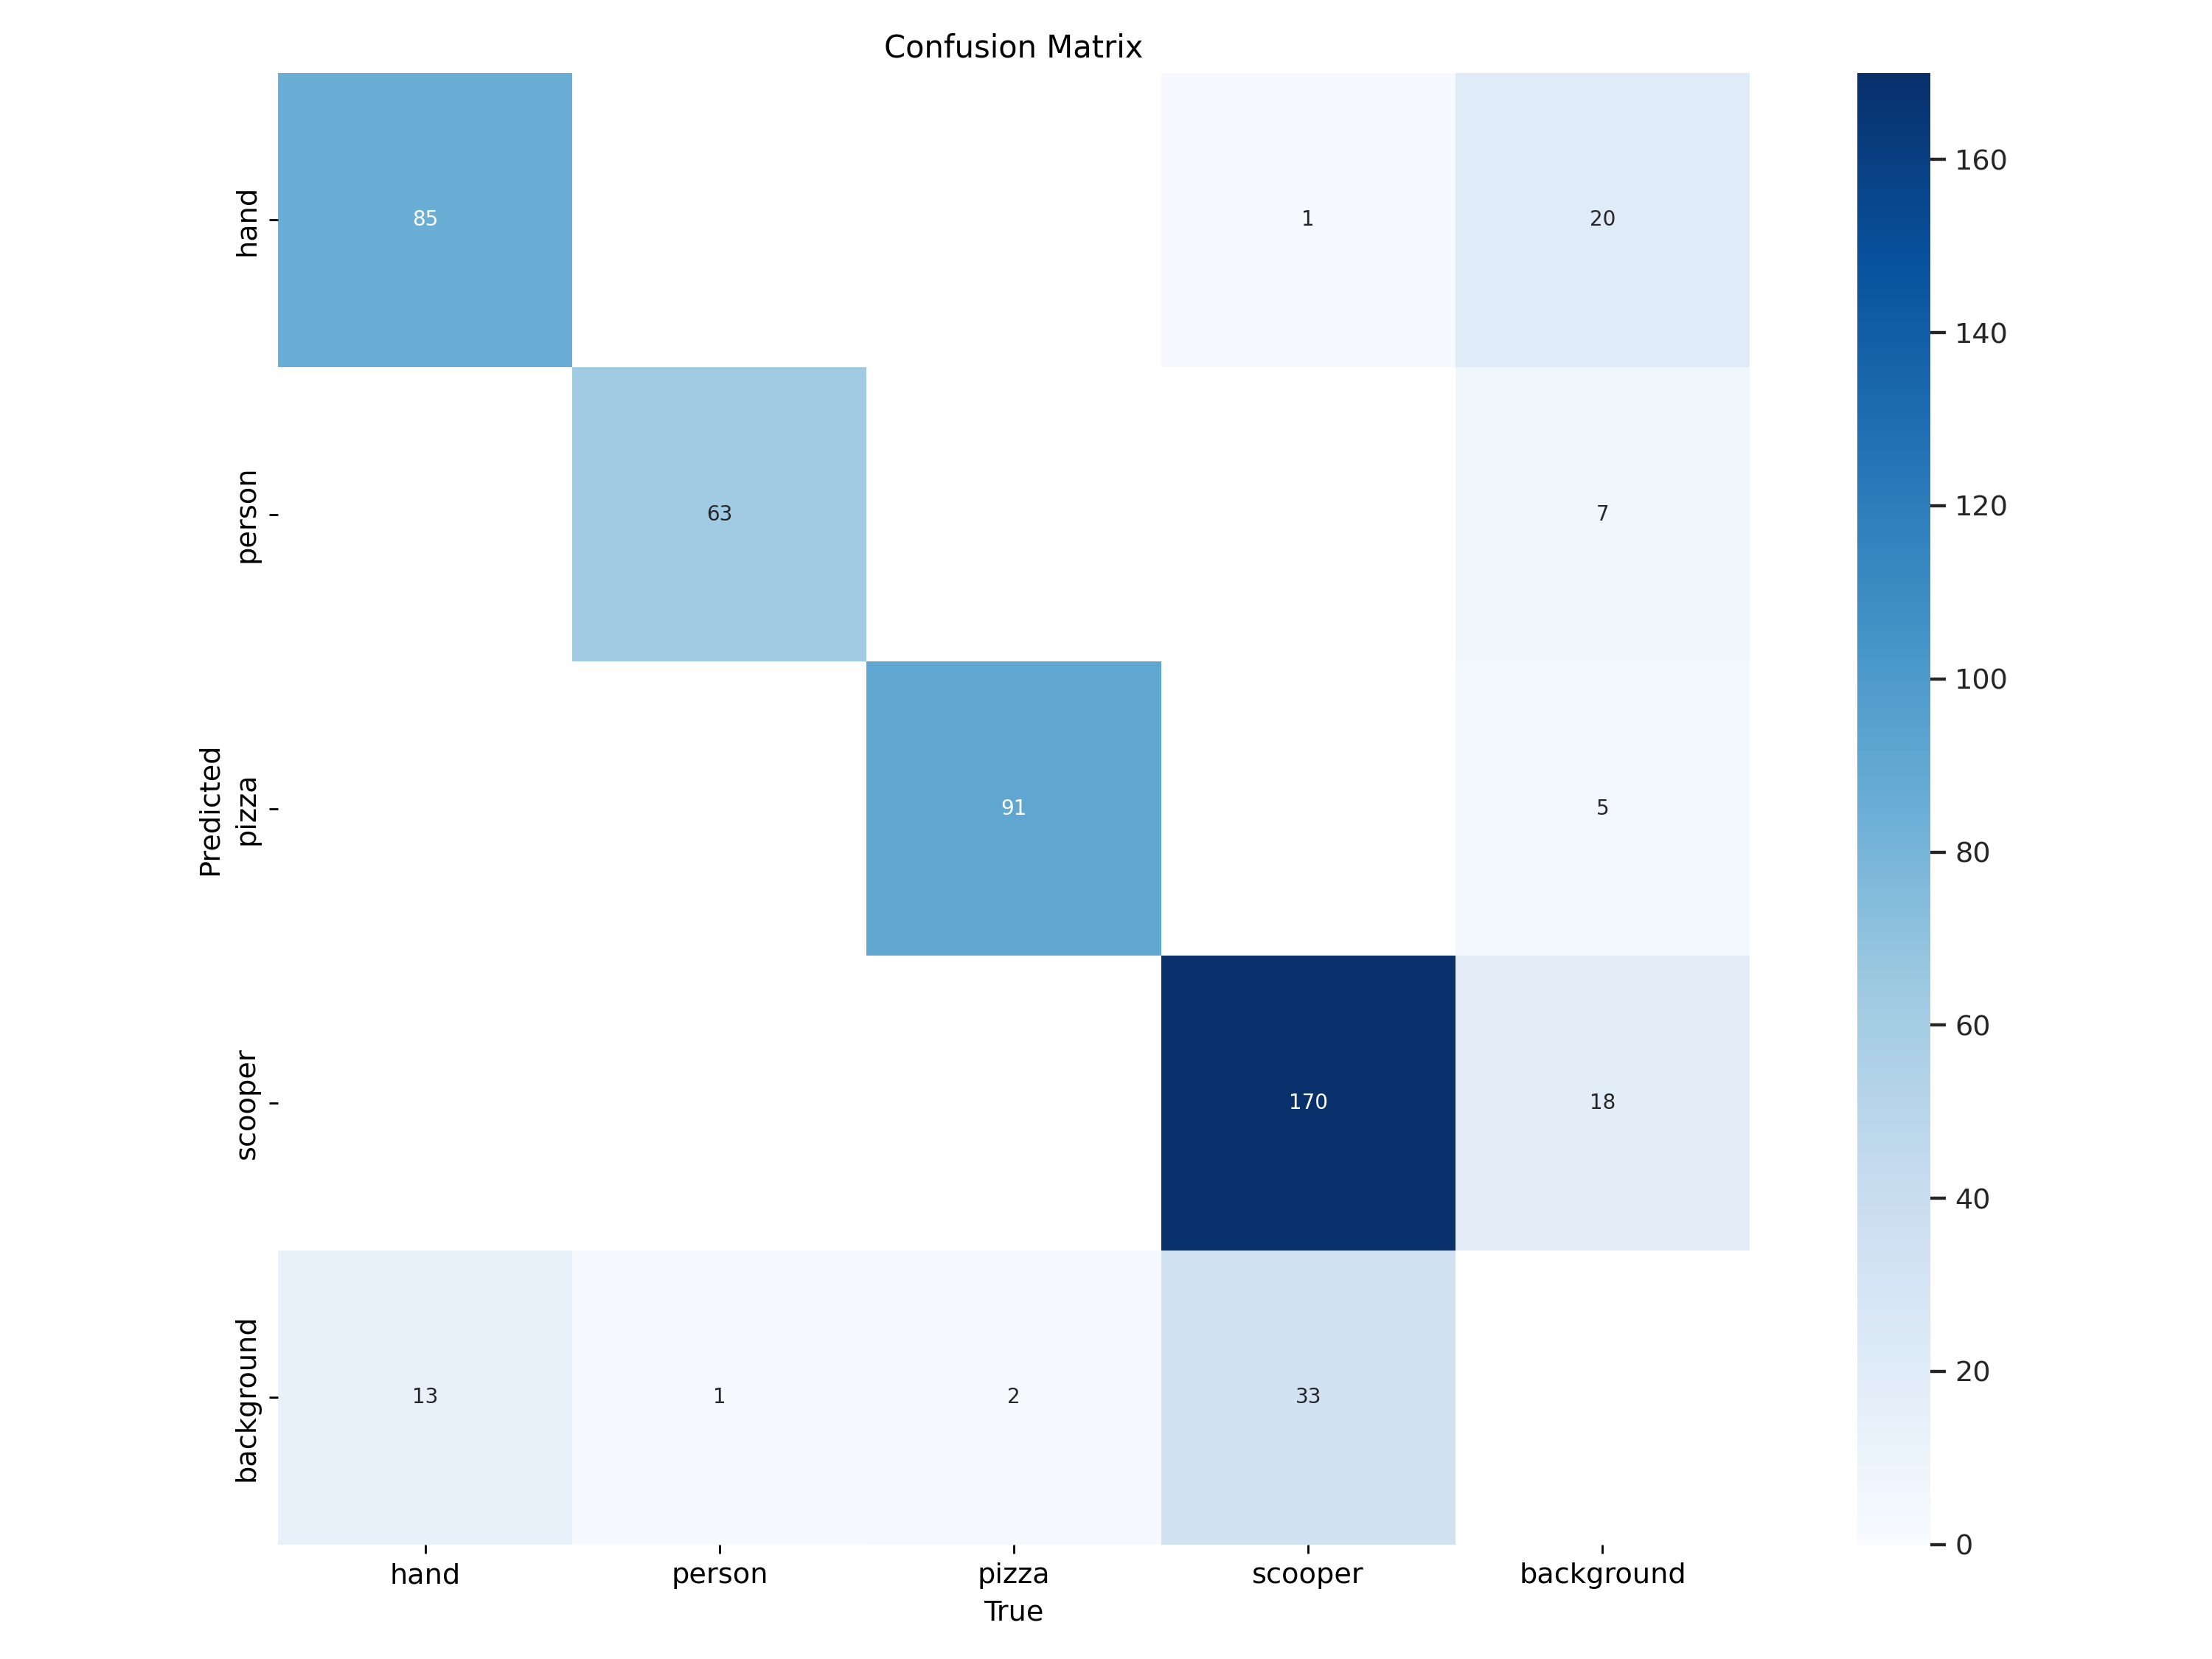

In [27]:
from IPython.display import Image

Image(filename="runs/detect/val/confusion_matrix.png")


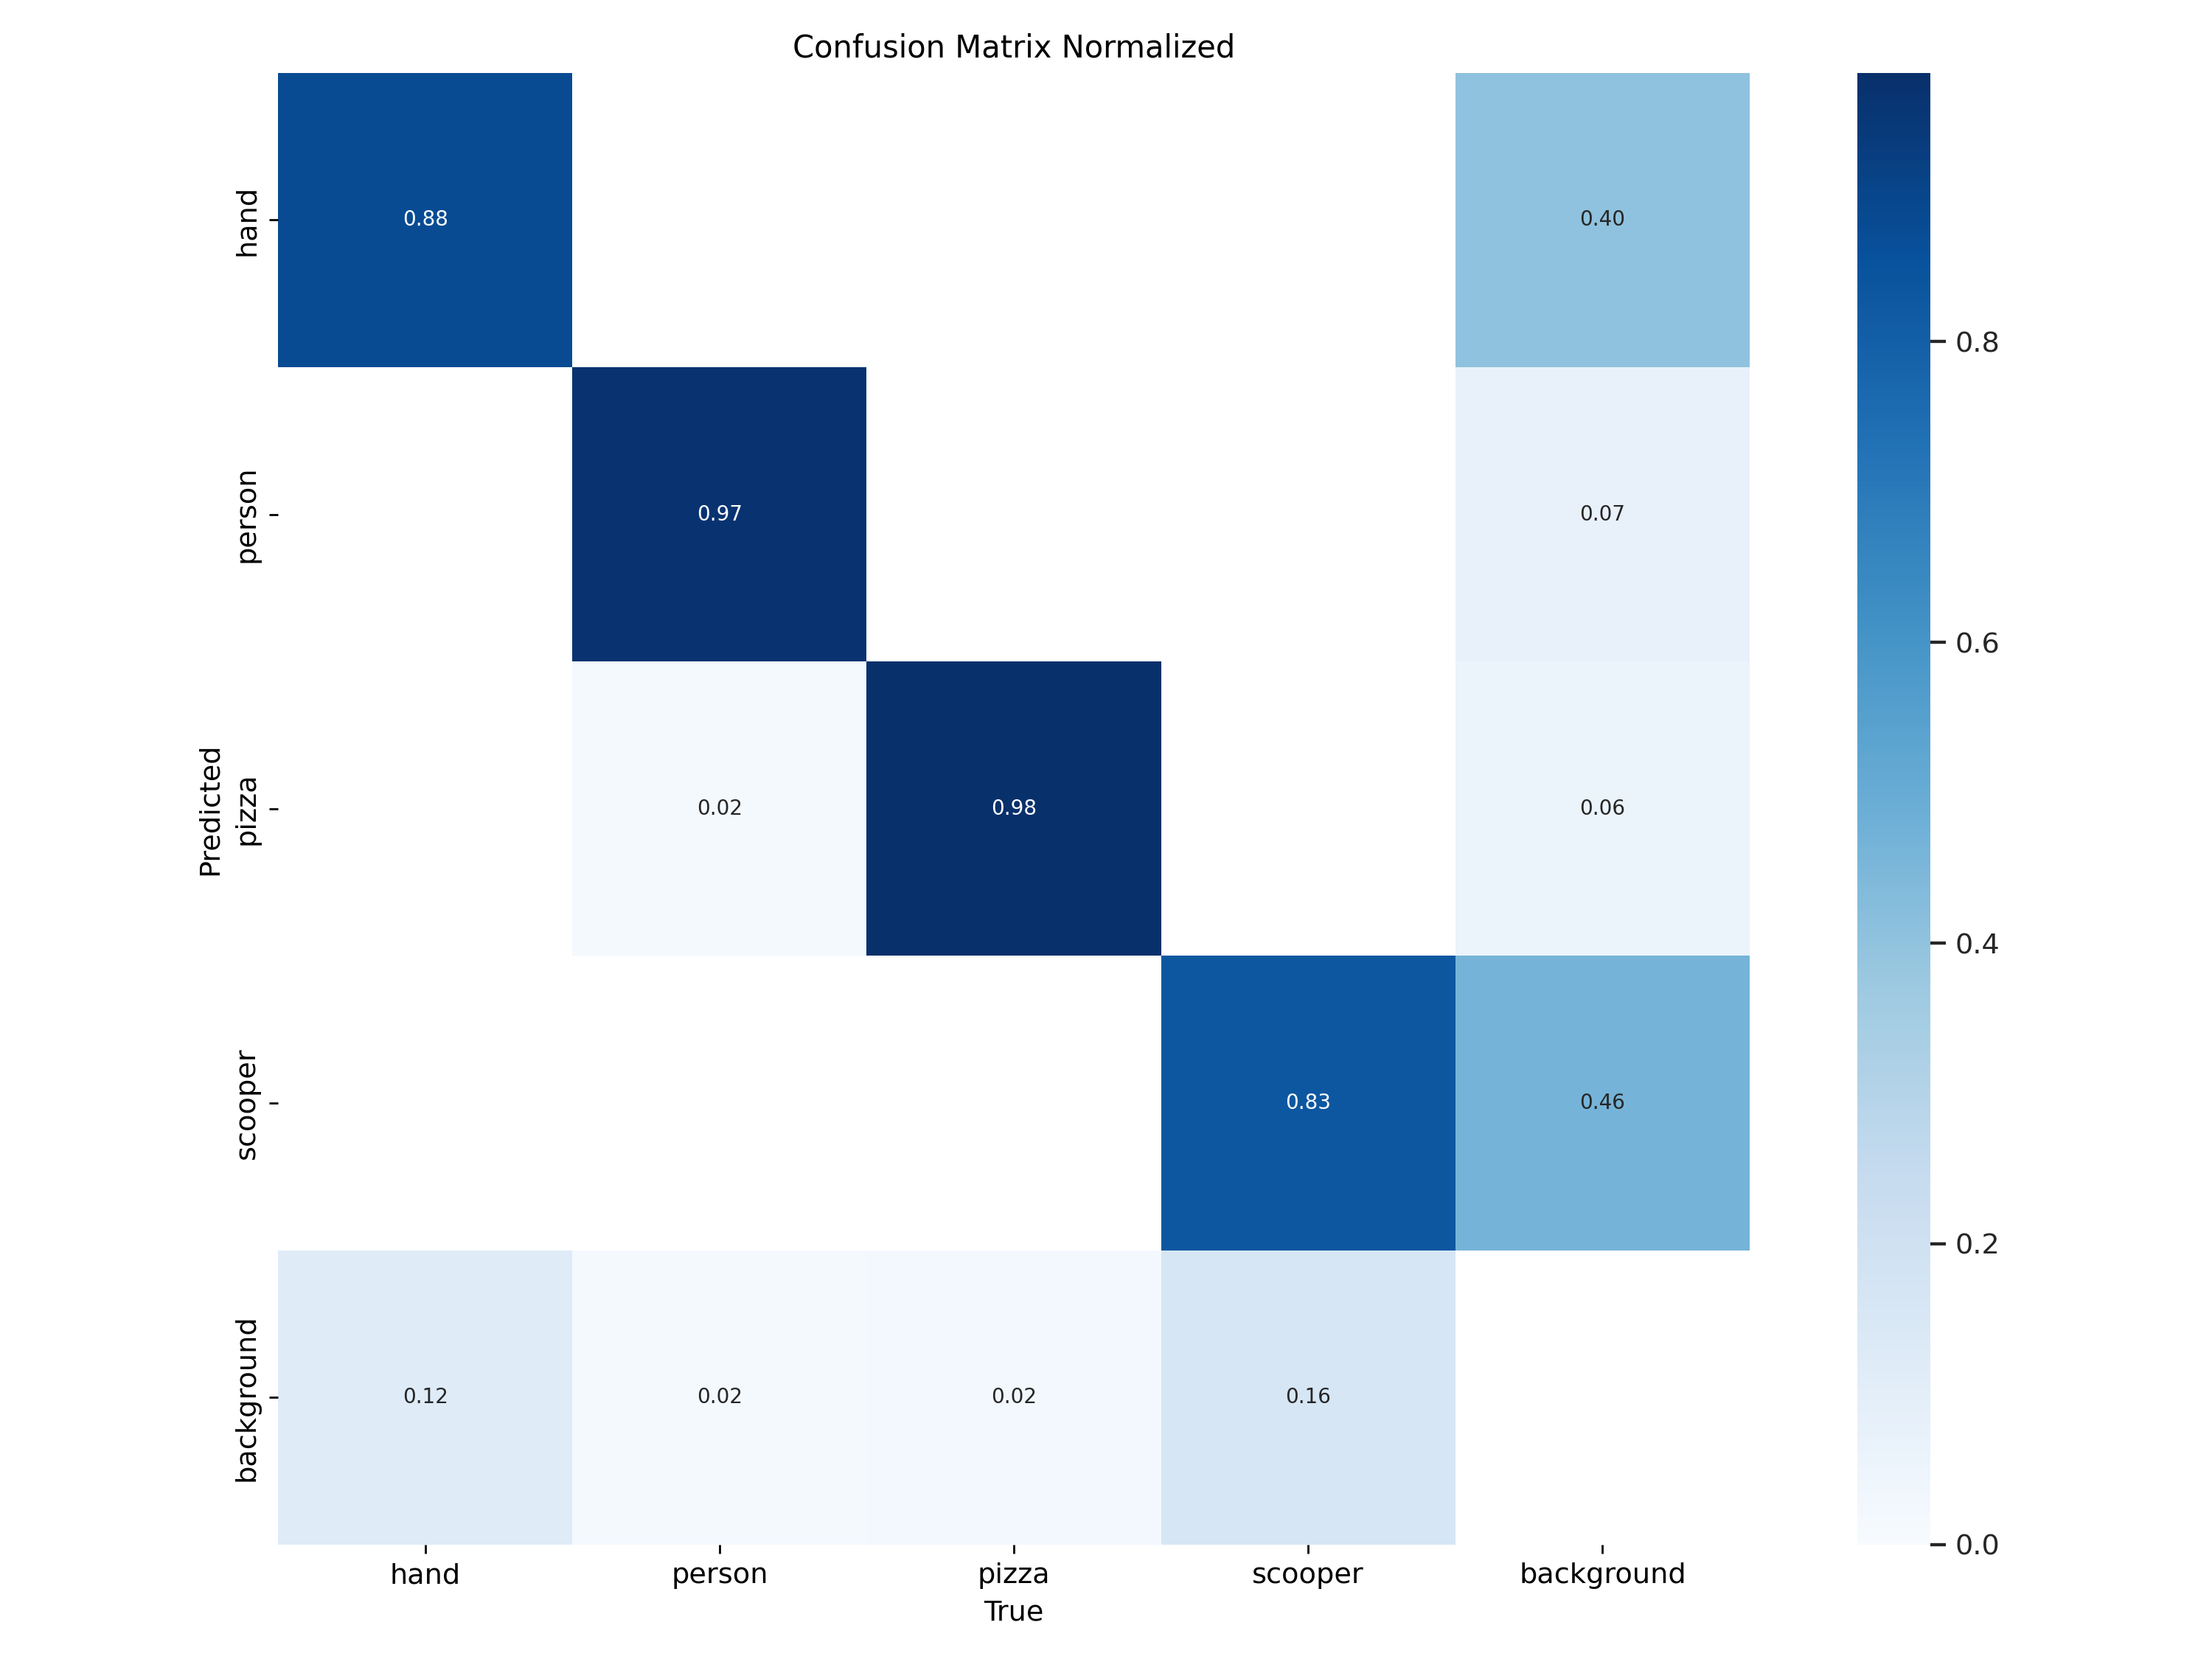

In [31]:
Image(filename="/kaggle/working/yolov12/runs/detect/train7/confusion_matrix_normalized.png")


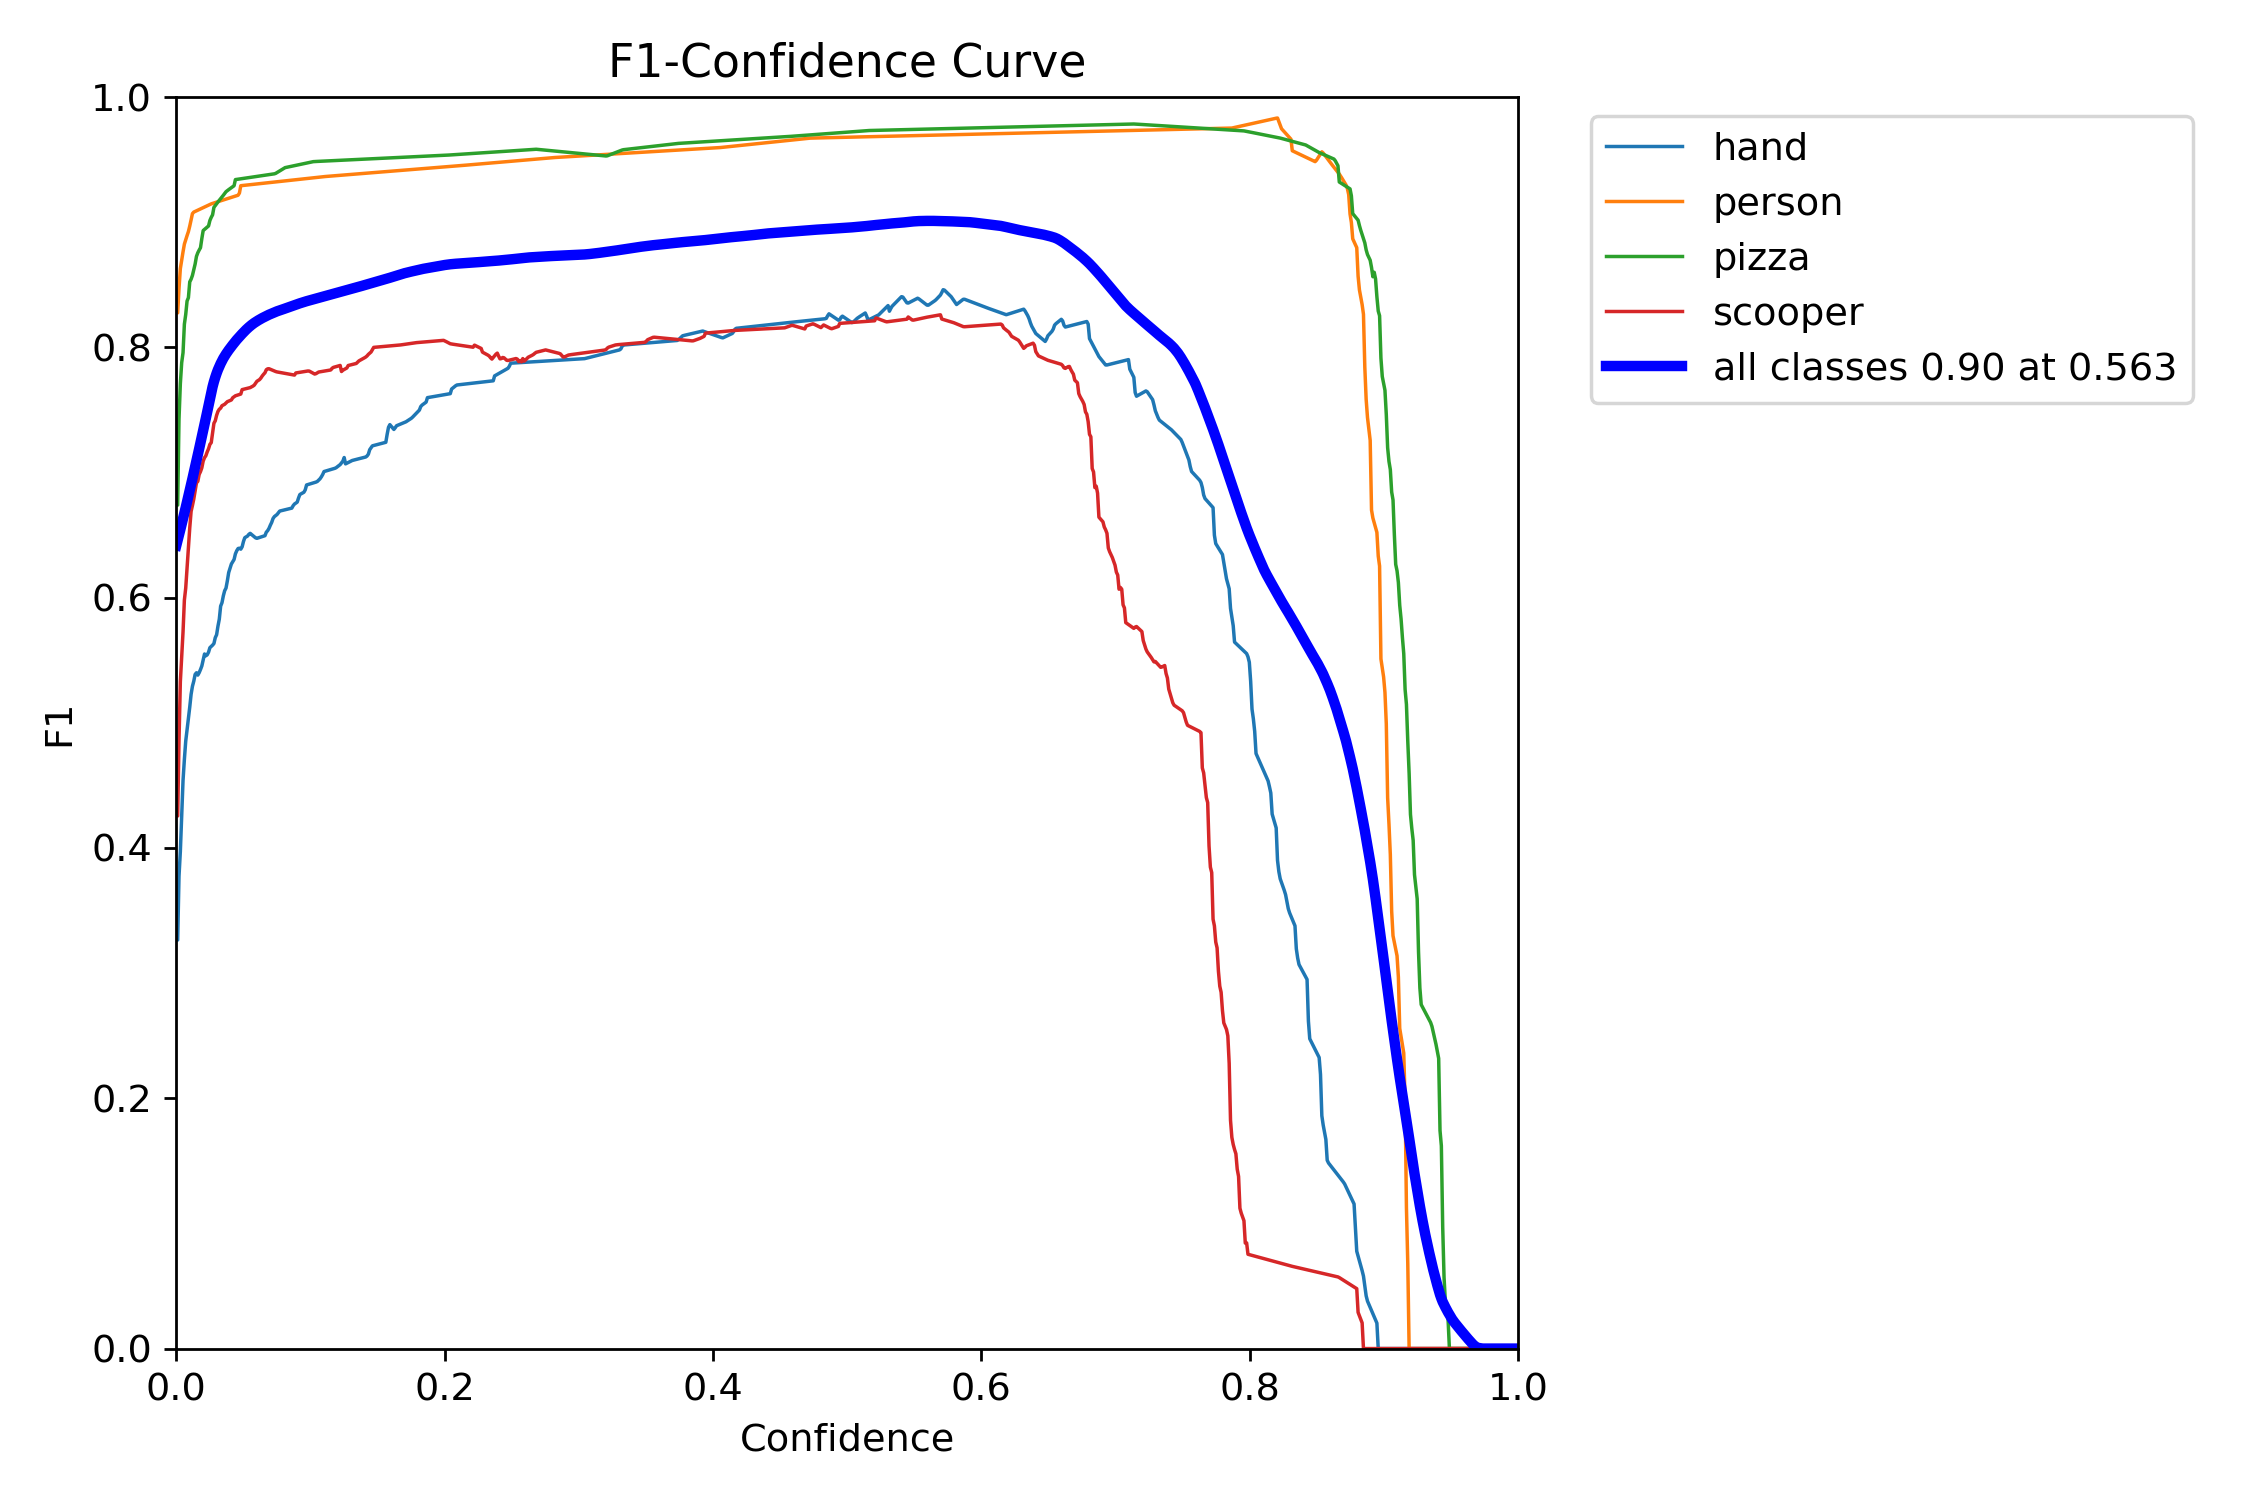

In [32]:
Image(filename="/kaggle/working/yolov12/runs/detect/train7/F1_curve.png")


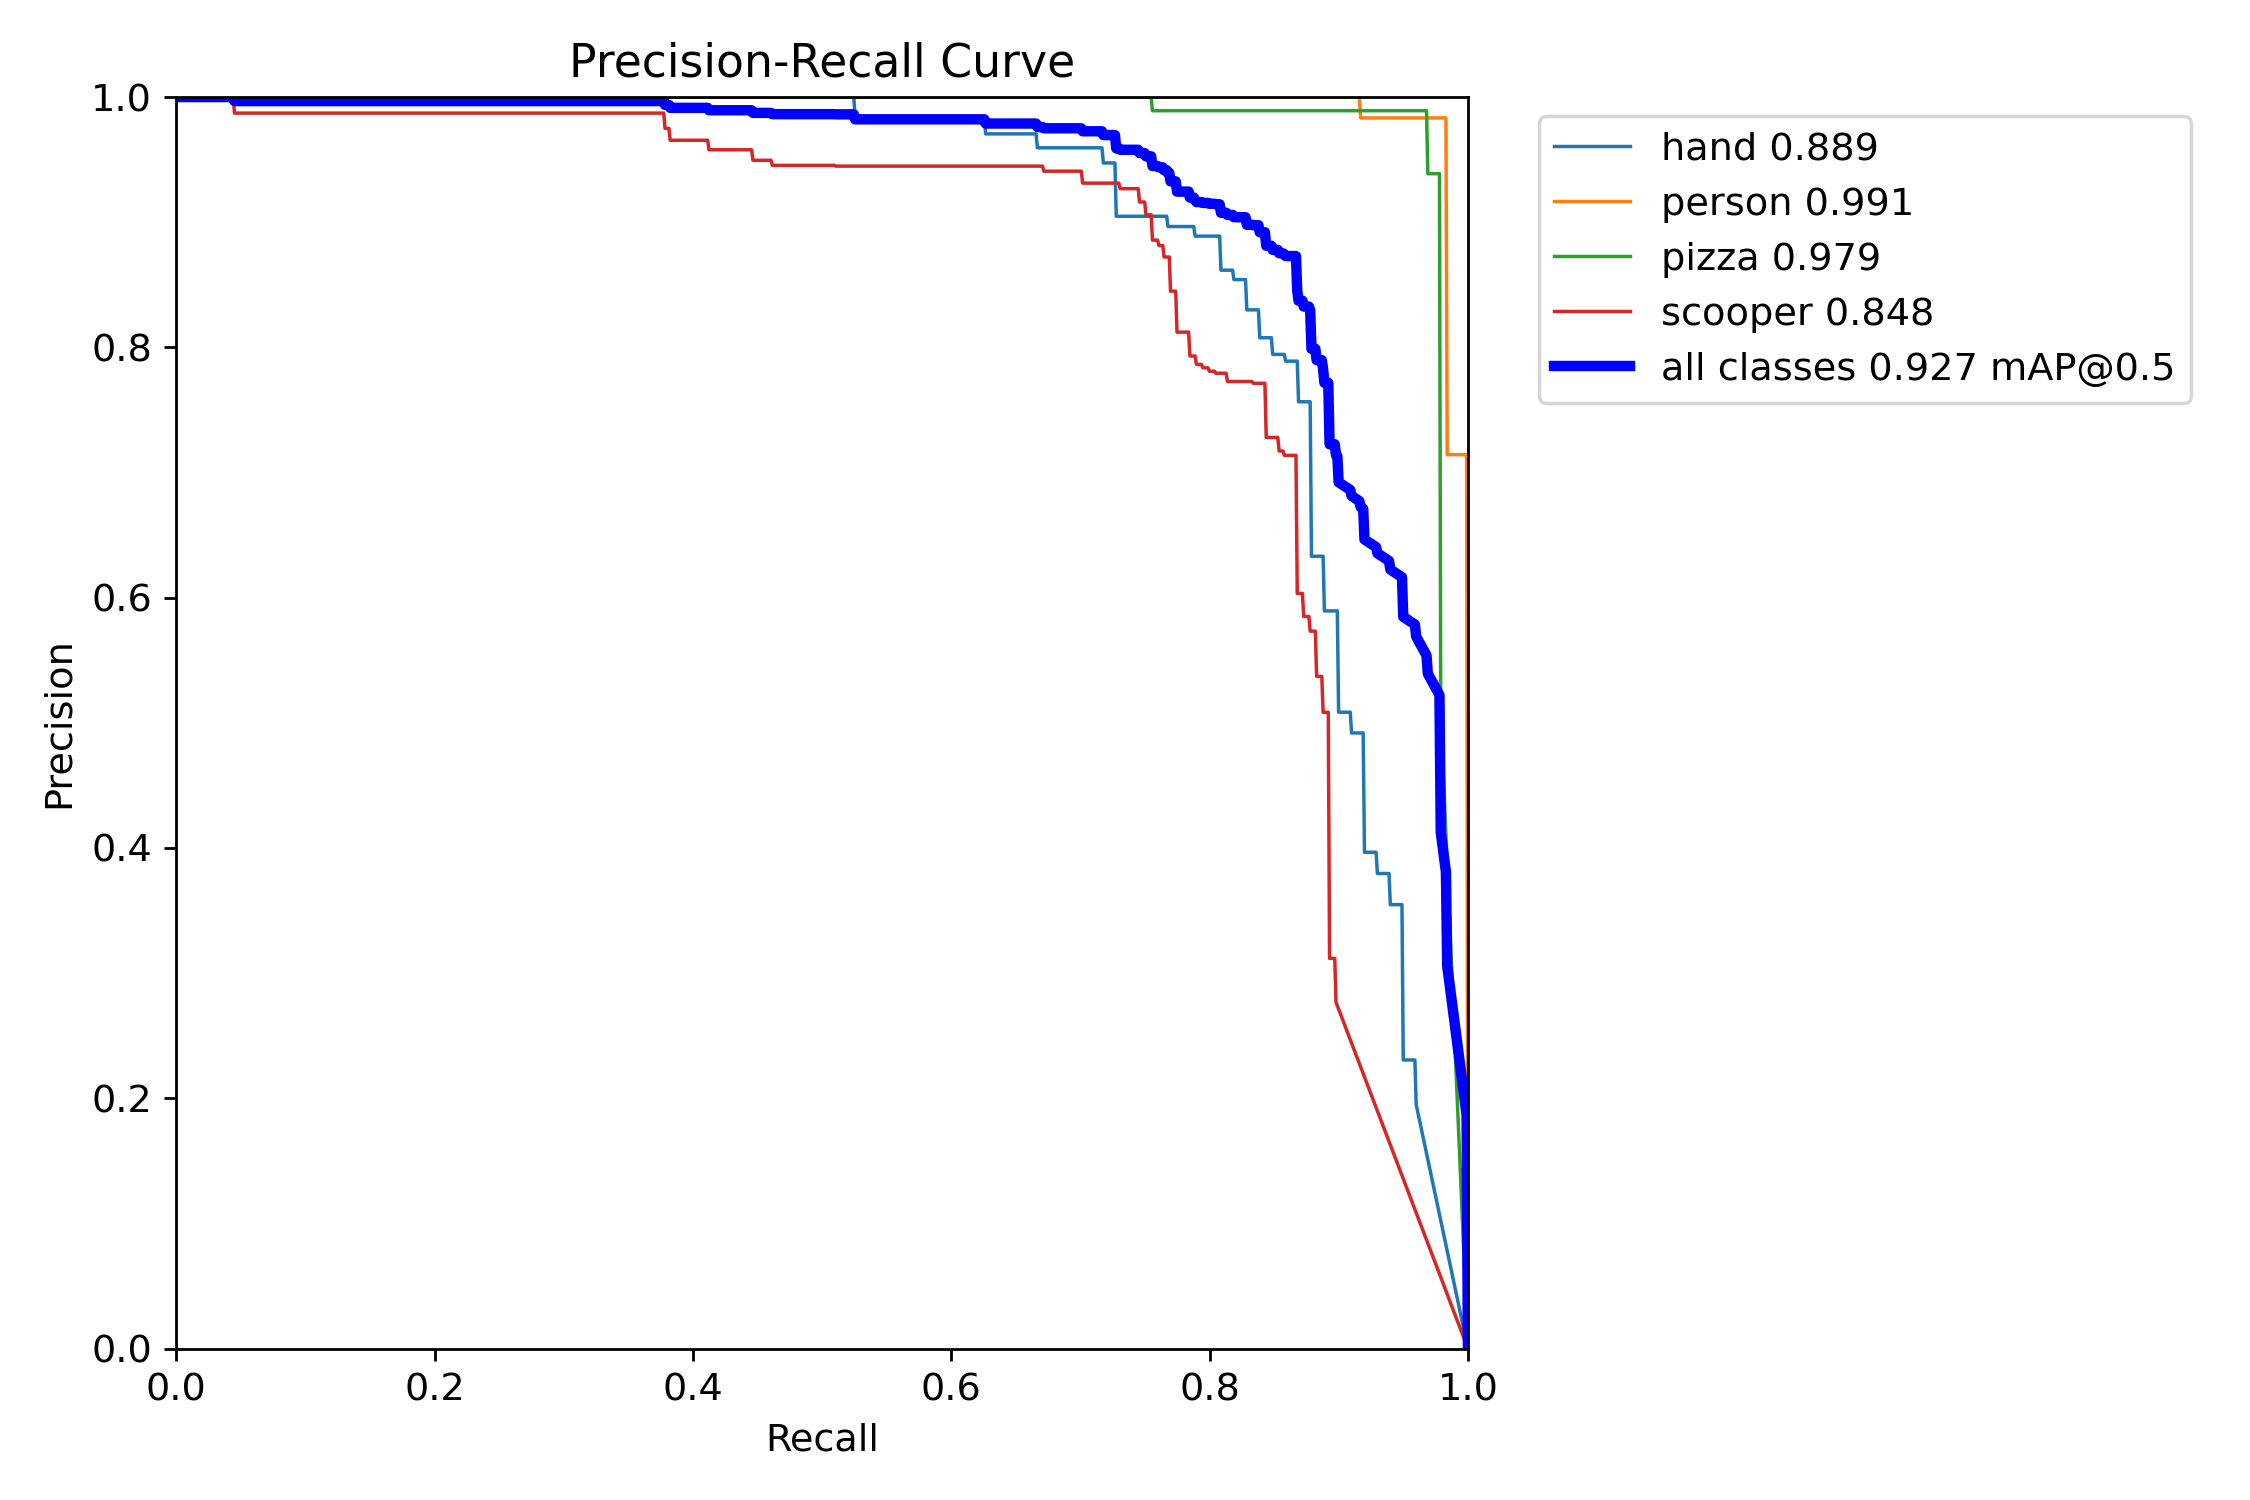

In [33]:
Image(filename="/kaggle/working/yolov12/runs/detect/train7/PR_curve.png")


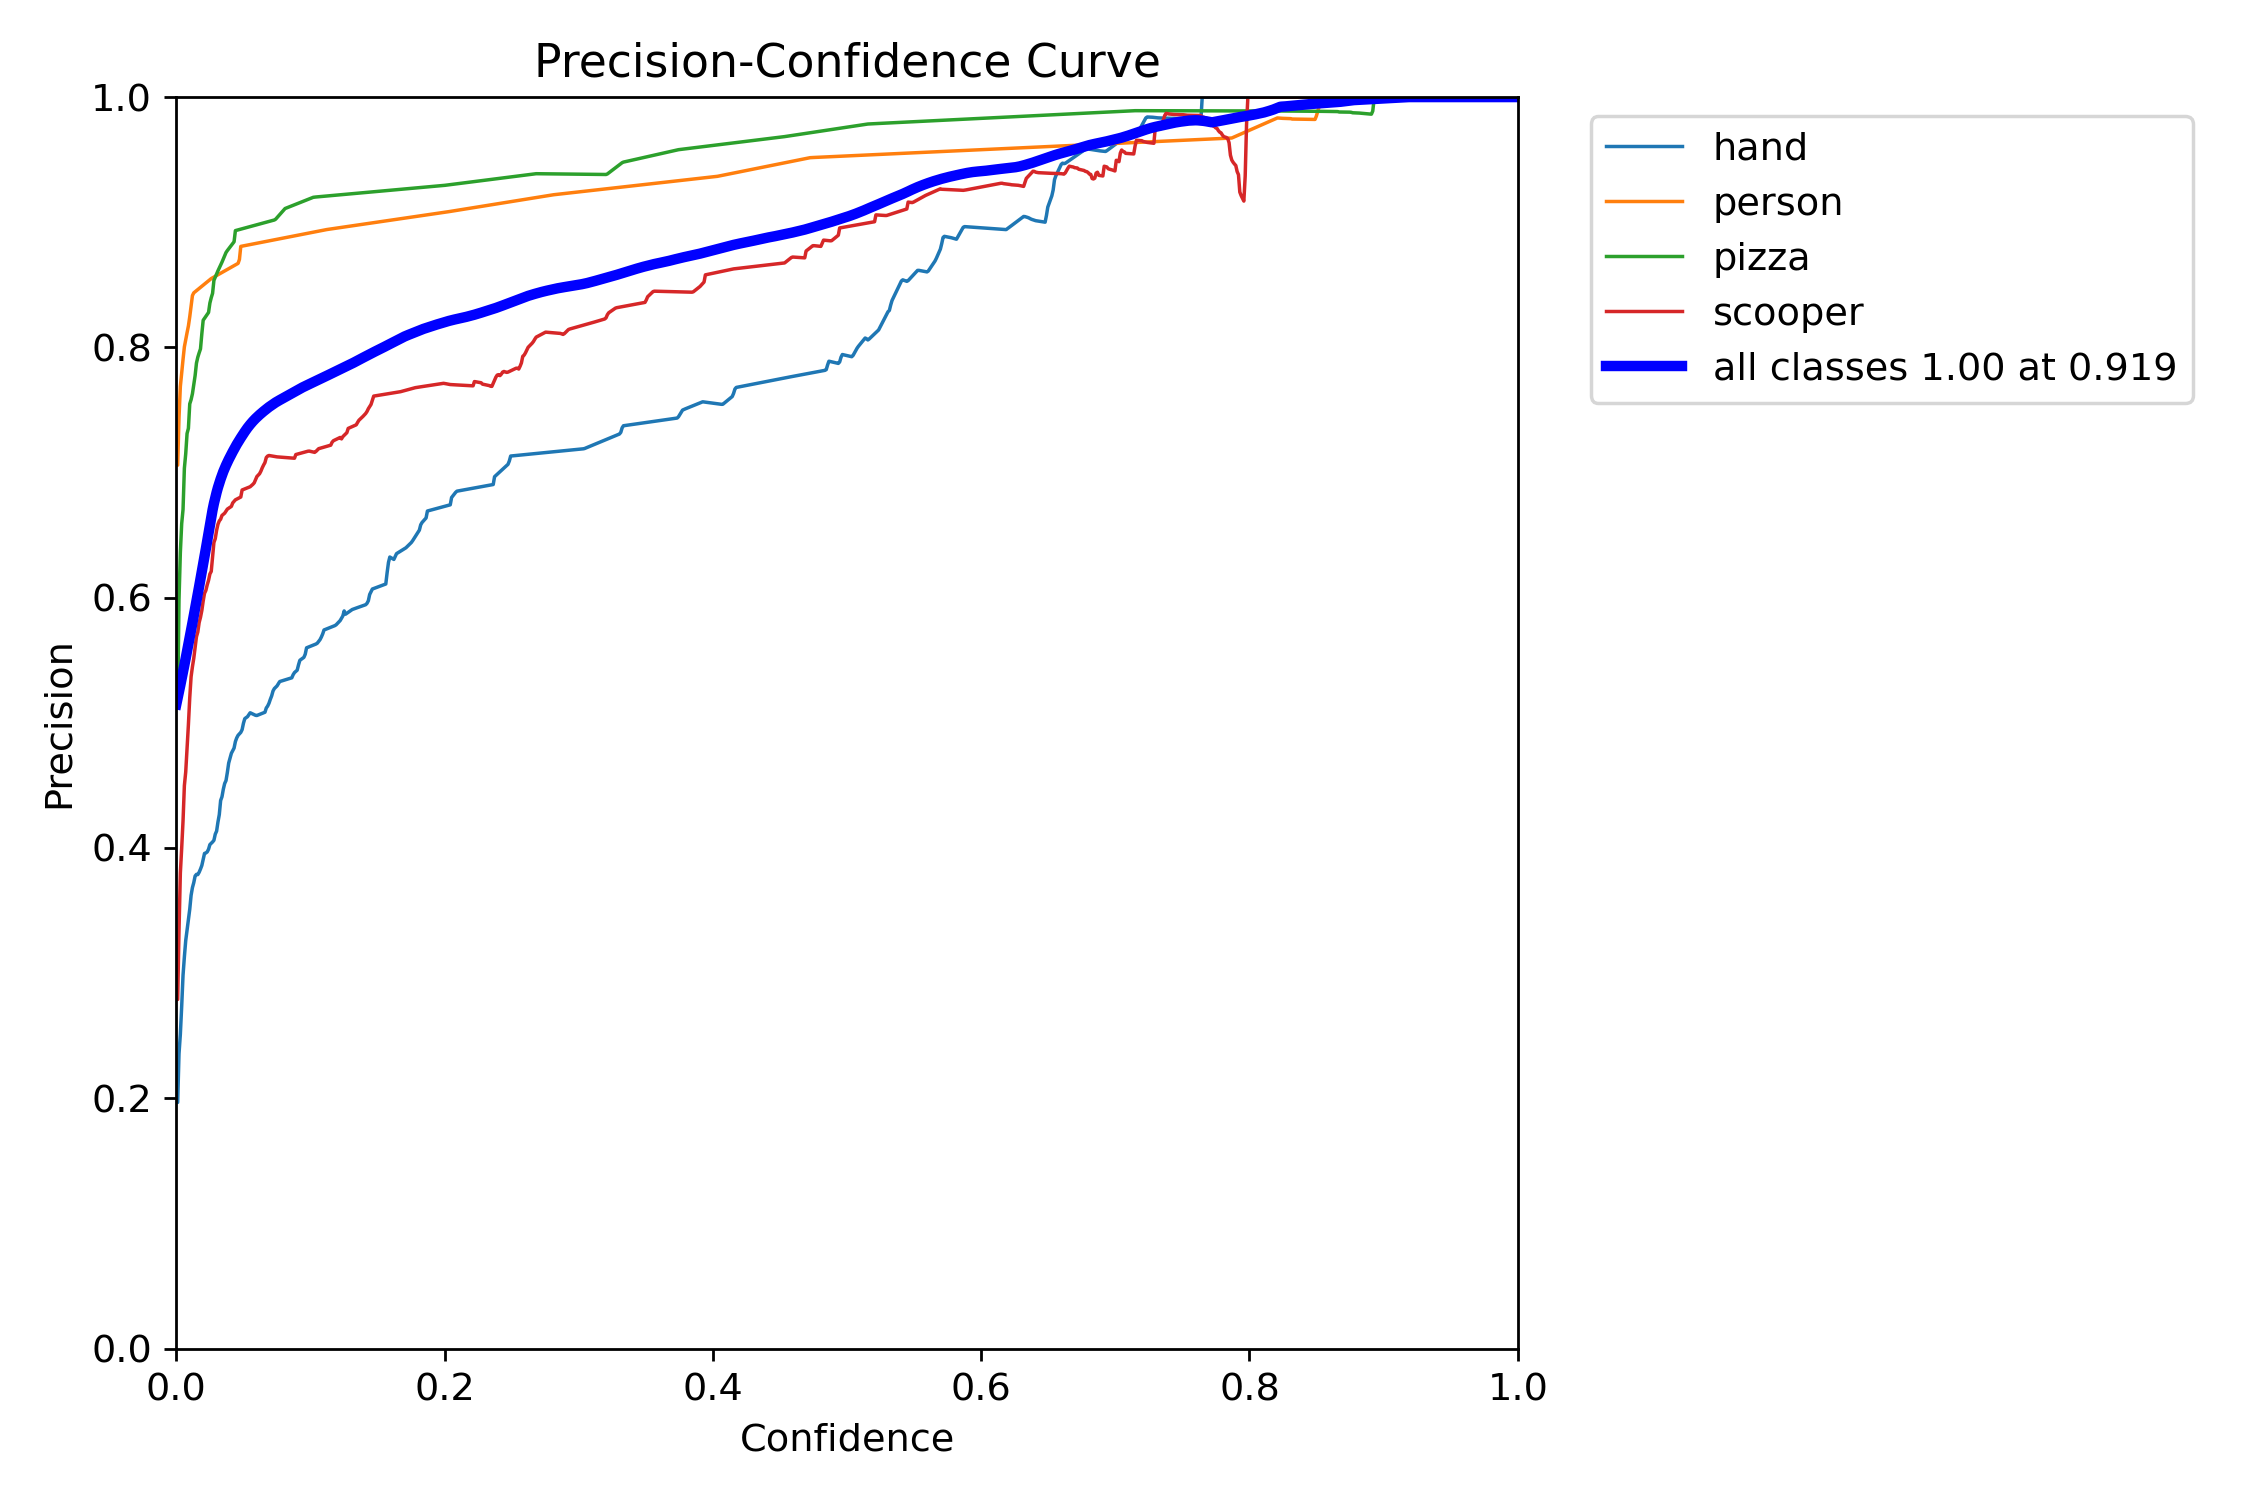

In [34]:
Image(filename="/kaggle/working/yolov12/runs/detect/train7/P_curve.png")


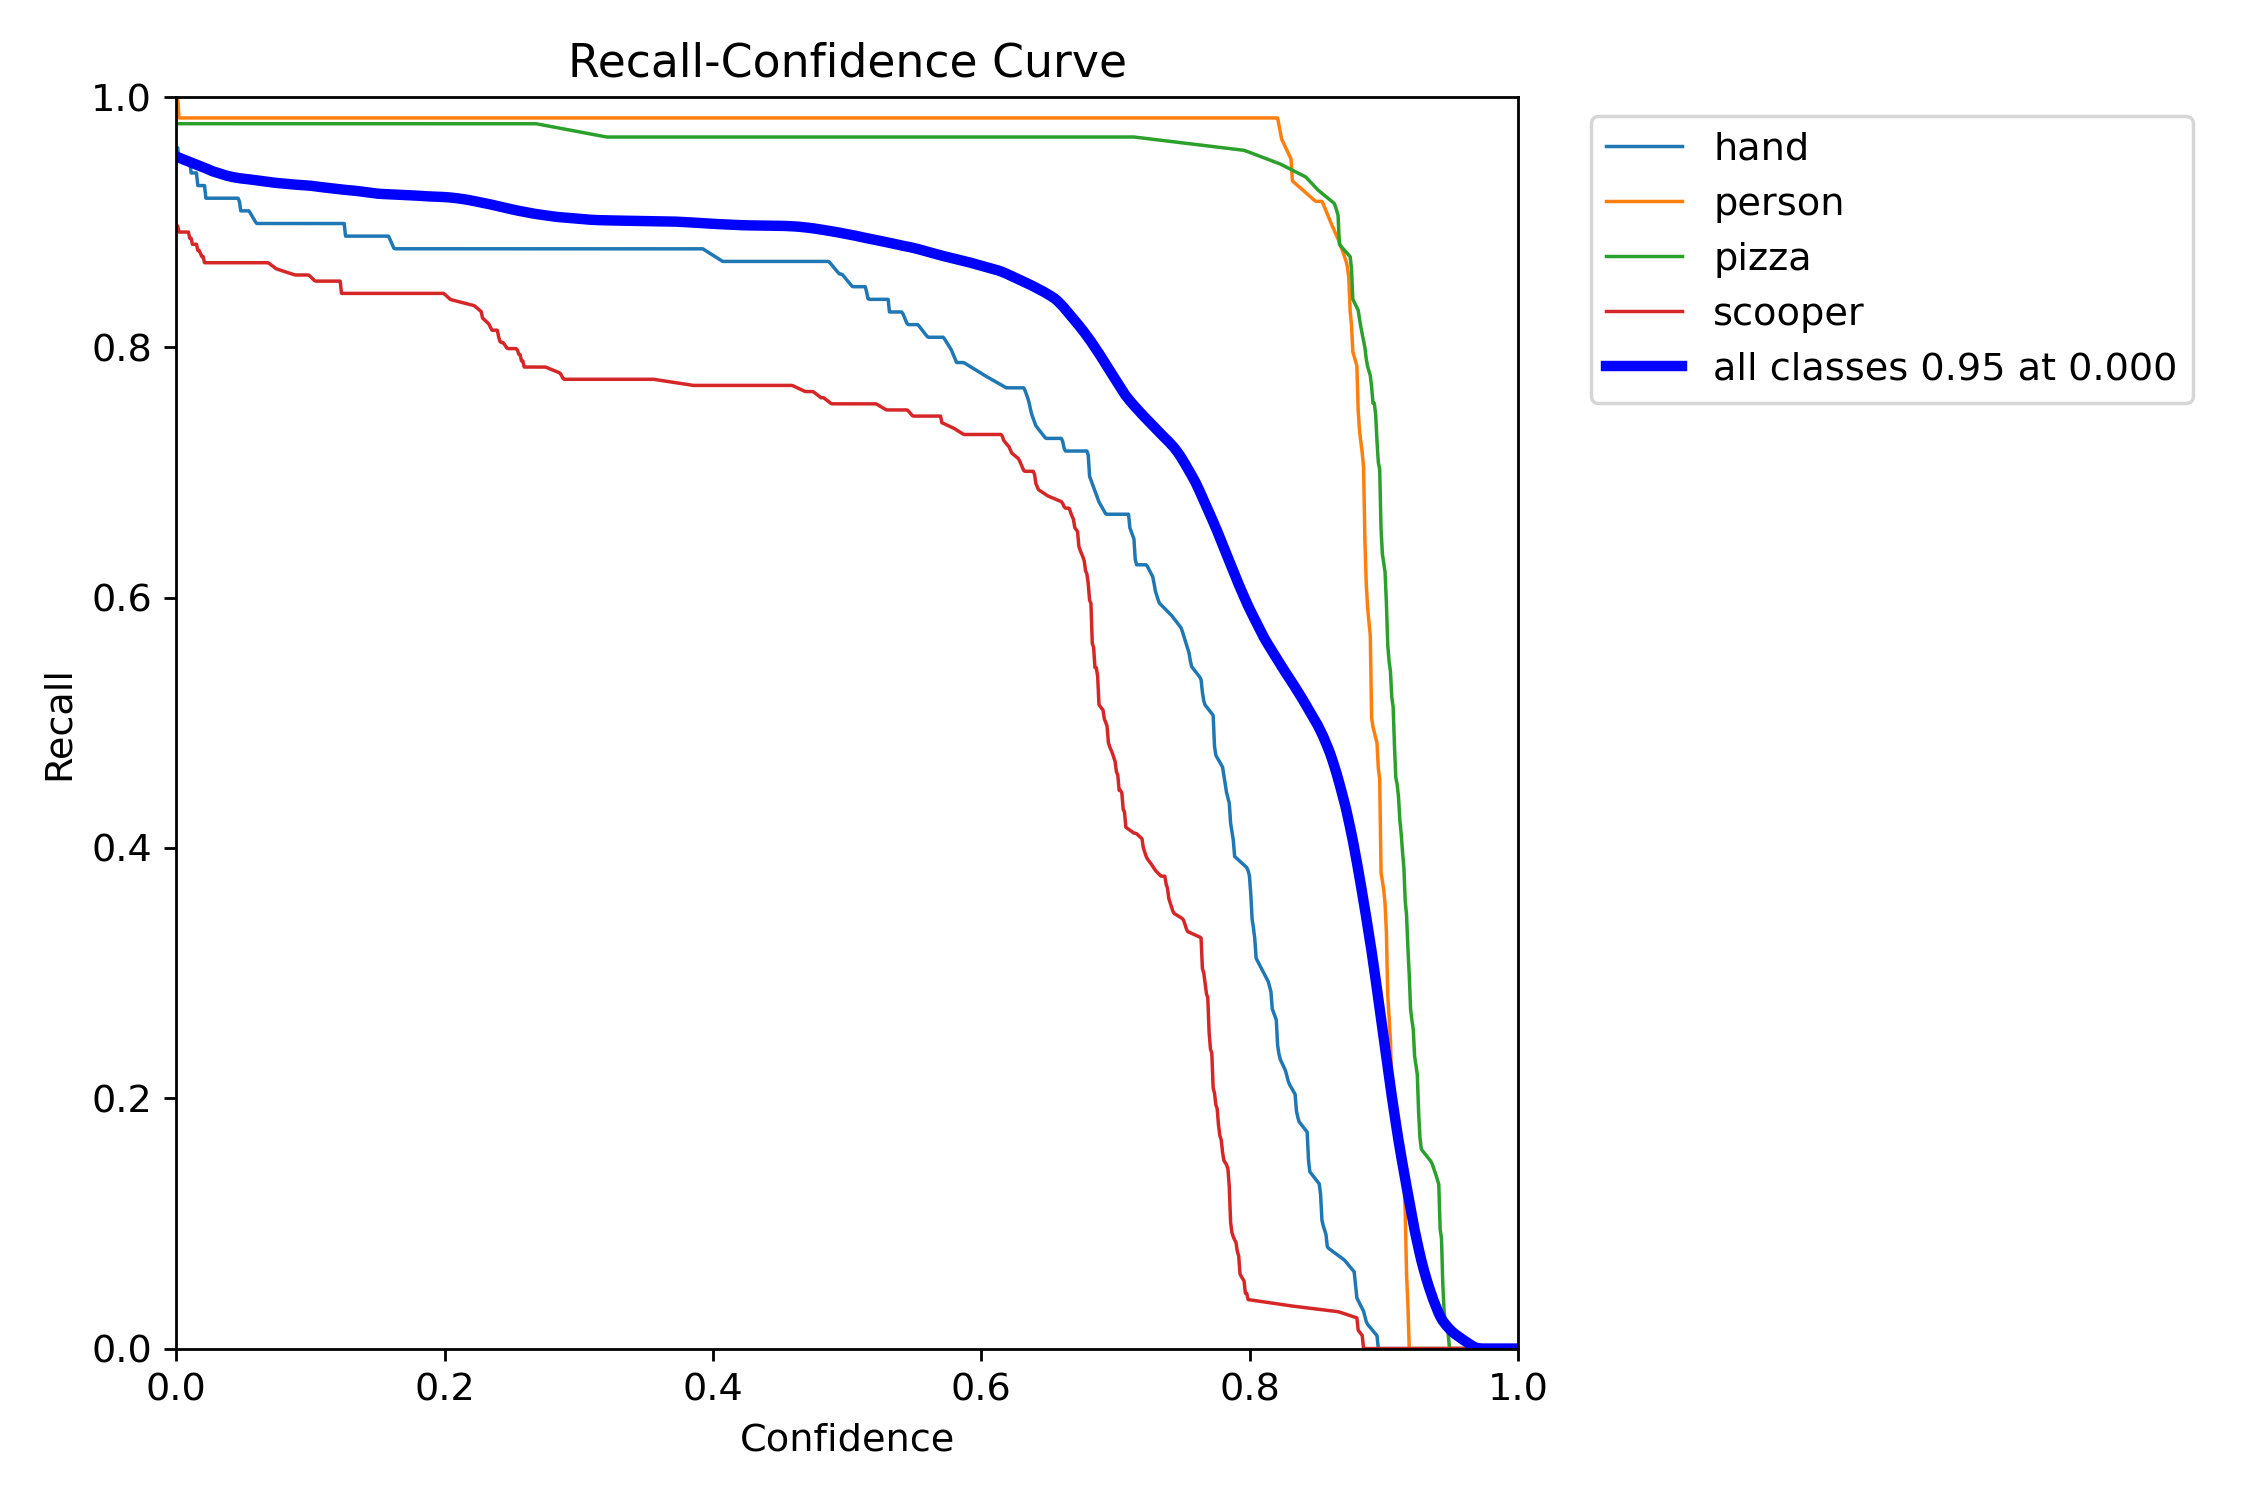

In [35]:
Image(filename="/kaggle/working/yolov12/runs/detect/train7/R_curve.png")


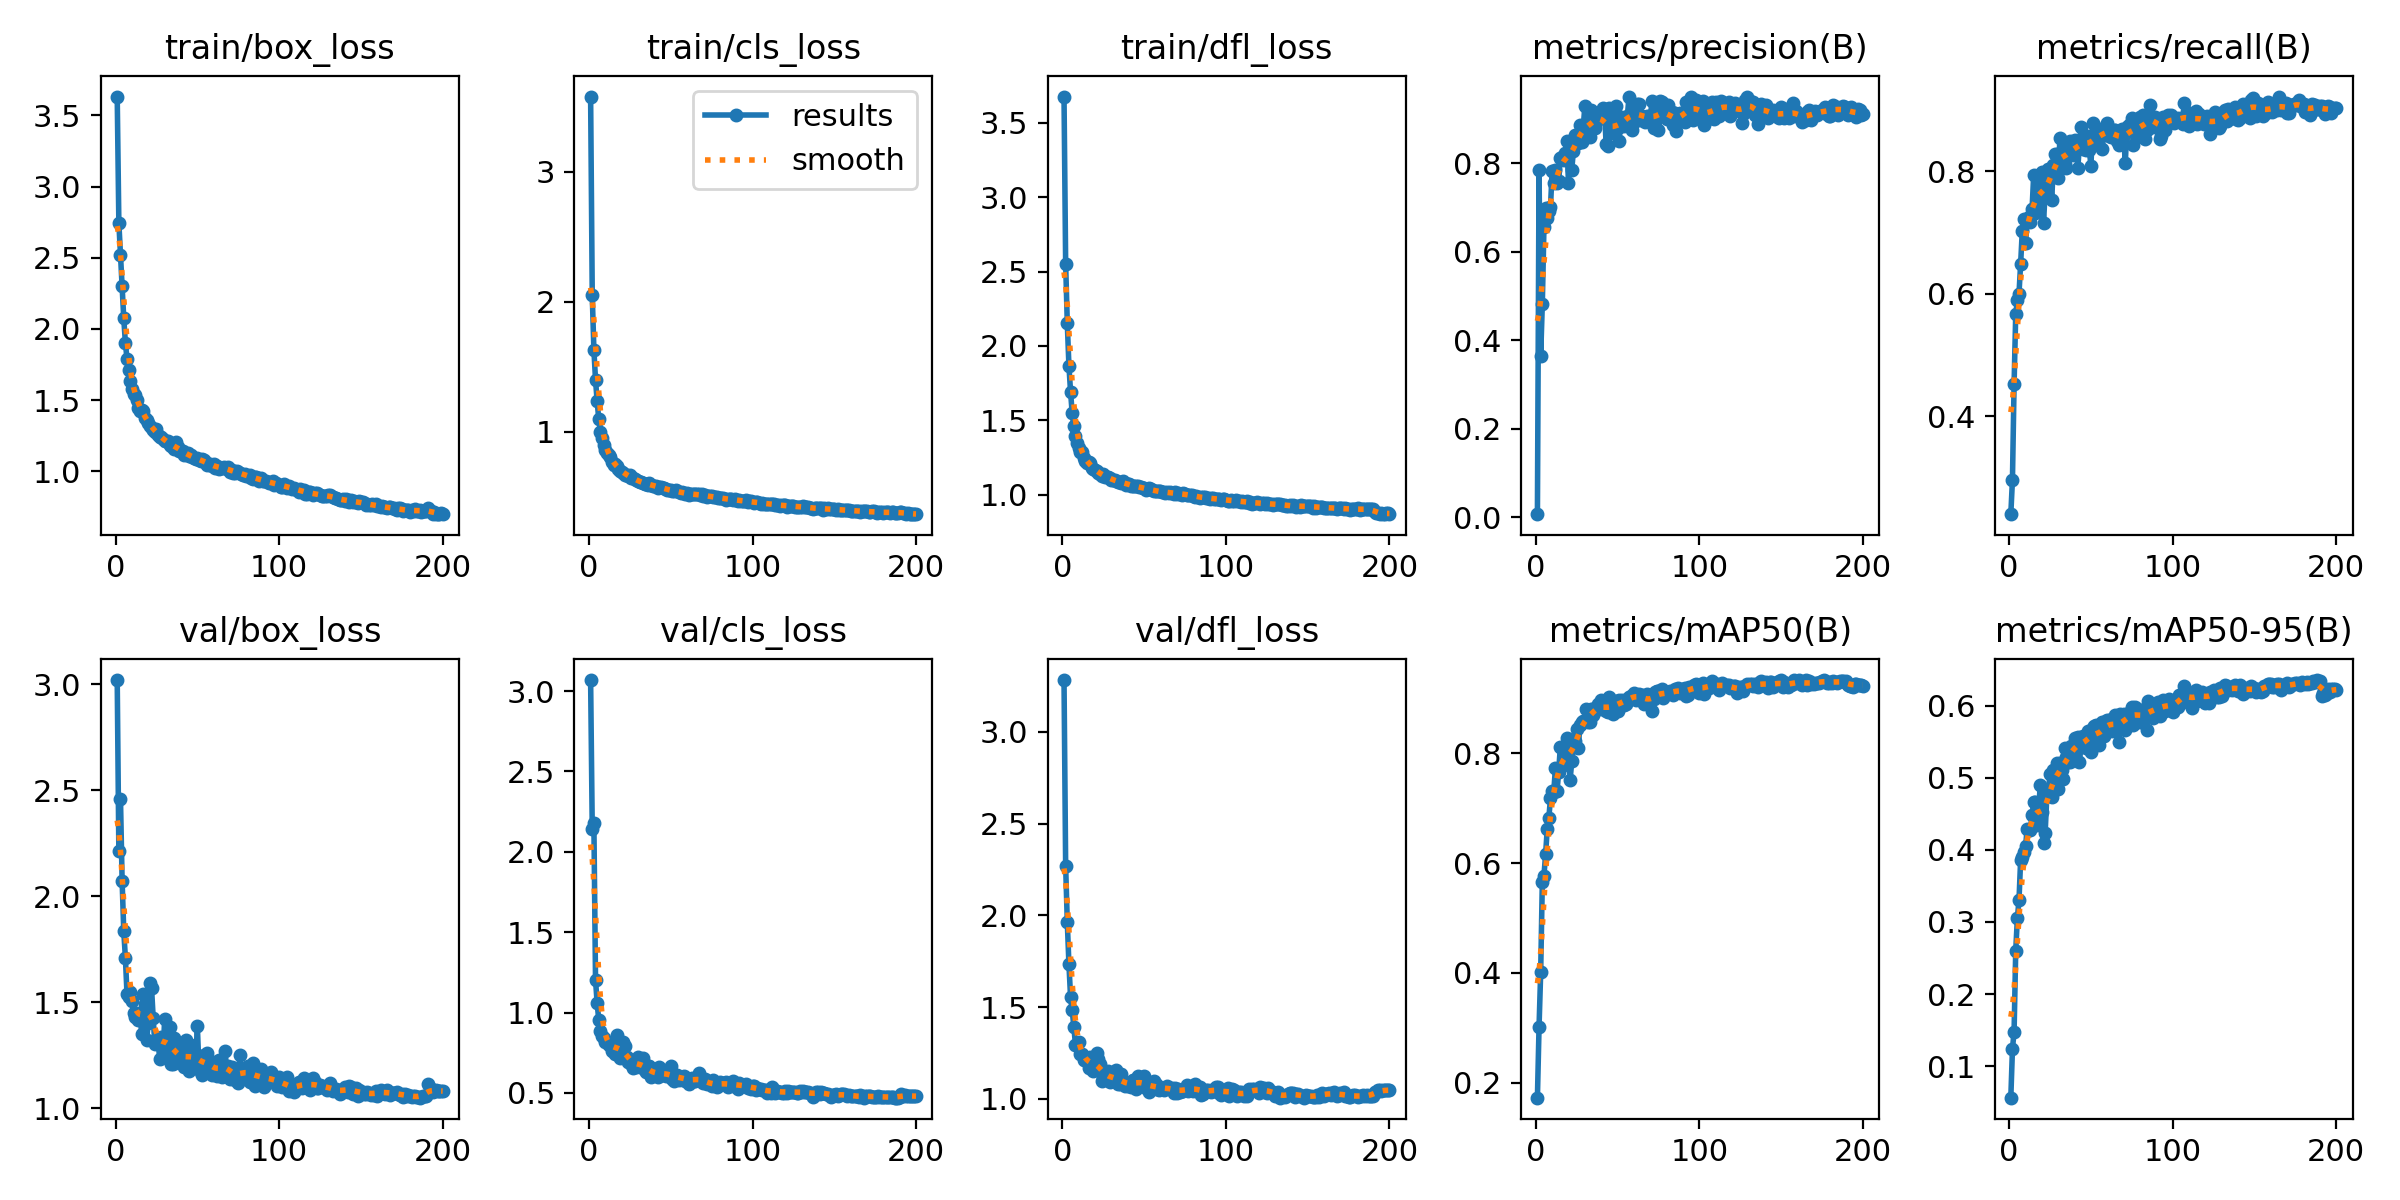

In [36]:
Image(filename="/kaggle/working/yolov12/runs/detect/train7/results.png")


In [37]:
import os
os.listdir("runs/detect/val")


['predictions.json',
 'val_batch2_labels.jpg',
 'val_batch0_labels.jpg',
 'confusion_matrix_normalized.png',
 'val_batch0_pred.jpg',
 'val_batch2_pred.jpg',
 'PR_curve.png',
 'F1_curve.png',
 'val_batch1_pred.jpg',
 'val_batch1_labels.jpg',
 'confusion_matrix.png',
 'R_curve.png',
 'P_curve.png']

Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
Glyph 129302 (\N{ROBOT FACE}) missing from current font.


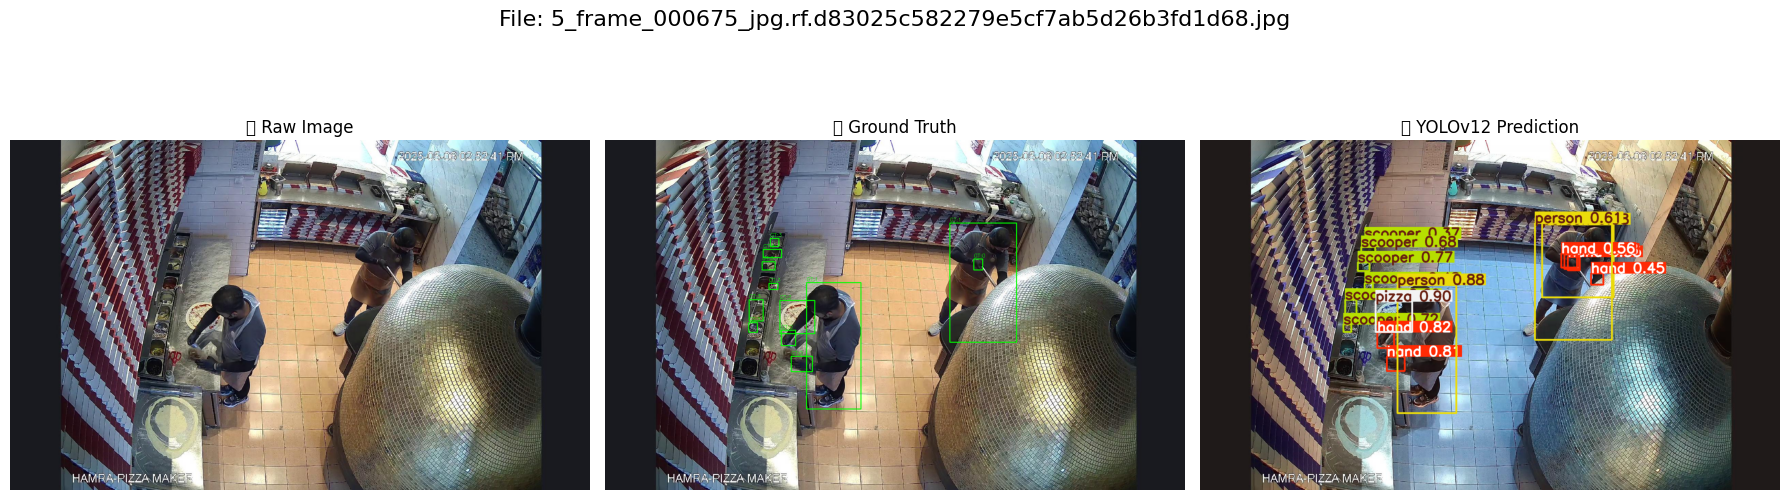

In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from ultralytics import YOLO
import random


# === Config ===
test_img_dir = "/kaggle/working/PizzaStore-5/test/images"
test_label_dir = "/kaggle/working/PizzaStore-5/test/labels"
model_path = "/kaggle/working/yolov12/runs/detect/train7/weights/best.pt"

# === Step 1: Choose a test image ===
img_file = random.choice(os.listdir(test_img_dir))
img_path = os.path.join(test_img_dir, img_file)
label_path = os.path.join(test_label_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

# === Step 2: Raw image ===
raw_img = cv2.imread(img_path)
raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

# === Step 3: Ground Truth ===
gt_img = raw_img_rgb.copy()
h, w, _ = gt_img.shape
if os.path.exists(label_path):
    with open(label_path, "r") as f:
        for line in f:
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = int((cx - bw / 2) * w)
            y1 = int((cy - bh / 2) * h)
            x2 = int((cx + bw / 2) * w)
            y2 = int((cy + bh / 2) * h)
            cv2.rectangle(gt_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(gt_img, f"GT:{int(cls)}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# === Step 4: Prediction ===
model = YOLO(model_path)
results = model(img_path, save=False, verbose=False)
pred_img = results[0].plot()  # returns numpy array with predictions

# === Step 5: Plot all together ===
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(raw_img_rgb)
axs[0].set_title("🔹 Raw Image")
axs[0].axis("off")

axs[1].imshow(gt_img)
axs[1].set_title("✅ Ground Truth")
axs[1].axis("off")

axs[2].imshow(pred_img)
axs[2].set_title("🤖 YOLOv12 Prediction")
axs[2].axis("off")

plt.suptitle(f"File: {img_file}", fontsize=16)
plt.tight_layout()
plt.show()


In [44]:
import shutil

# Zip the entire yolov12 folder
shutil.make_archive("yolov12", 'zip', "/kaggle/working/yolov12")


'/kaggle/working/yolov12/yolov12.zip'